In [308]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf

In [309]:
#Loading the dataset or dataframe
dftrain = pd.read_excel('New_Bank_loan_data.xlsx')
dfeval =  pd.read_excel('New_Bank_loan_data.xlsx')

#handling the missing value
dftrain.dropna(inplace=True)
dfeval.dropna(inplace=True)

In [310]:
# Performing EDA for checking the data structures
dftrain.head()
# dftrain.describe()
# dftrain.size

,ID,Age,Gender,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Home Ownership,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,M,1,49.0,91107,4,1.6,1,0,Home Owner,0,1,0,0.0,0
1,2,45,M,19,34.0,90089,3,1.5,1,0,Rent,0,1,0,0.0,0
2,3,39,M,15,11.0,94720,1,1.0,1,0,Rent,0,0,0,0.0,0
3,4,35,M,9,100.0,94112,1,2.7,2,0,Rent,0,0,0,0.0,0
4,5,35,M,8,45.0,91330,4,1.0,2,0,Rent,0,0,0,0.0,1


In [311]:
y_train = dftrain.pop('Personal Loan').astype(str)
y_eval = dfeval.pop('Personal Loan').astype(str)

<AxesSubplot: >

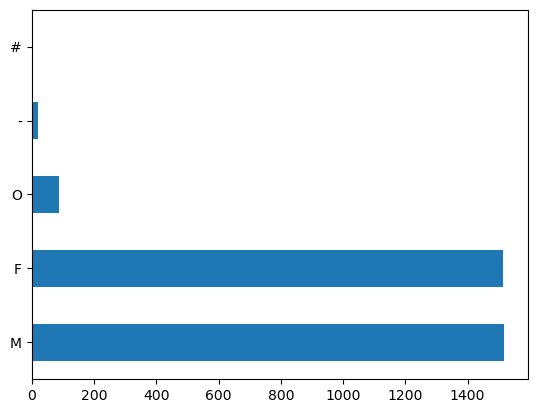

In [312]:
dftrain.Gender.value_counts().plot(kind='barh')

<AxesSubplot: >

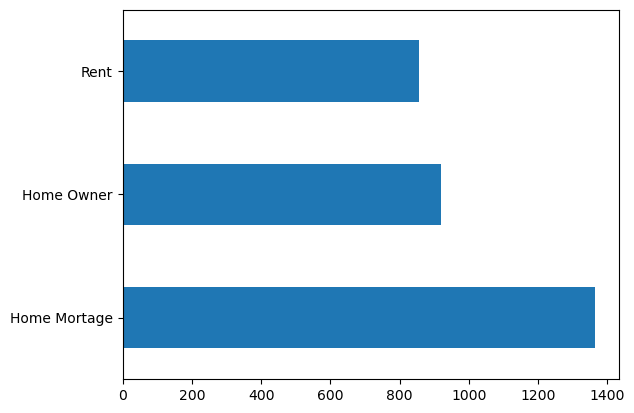

In [313]:
dftrain['Home Ownership'].value_counts().plot(kind='barh')

<AxesSubplot: >

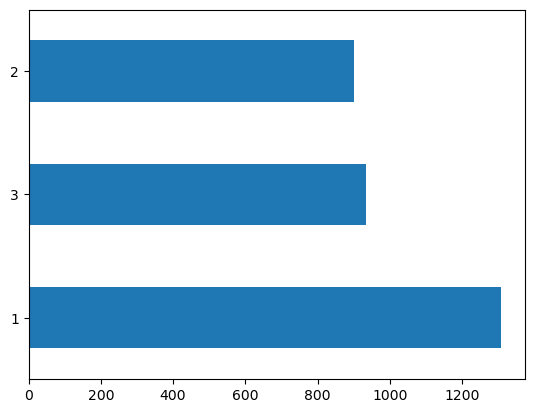

In [314]:
dftrain['Education'].value_counts().plot(kind='barh')

In [315]:
dftrain.head()

,ID,Age,Gender,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Home Ownership,Securities Account,CD Account,Online,CreditCard
0,1,25,M,1,49.0,91107,4,1.6,1,0,Home Owner,1,0,0.0,0
1,2,45,M,19,34.0,90089,3,1.5,1,0,Rent,1,0,0.0,0
2,3,39,M,15,11.0,94720,1,1.0,1,0,Rent,0,0,0.0,0
3,4,35,M,9,100.0,94112,1,2.7,2,0,Rent,0,0,0.0,0
4,5,35,M,8,45.0,91330,4,1.0,2,0,Rent,0,0,0.0,1


In [316]:
#Training and Testing dataset
CATAGORICAL_COLUMNS = ['Gender', 'Home Ownership']
NUMERICAL_COLUMNS = ['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard']


#Gets a list of all unique values from given feature columns
feature_columns = []
for feature_name in CATAGORICAL_COLUMNS:
    vocabulary = dftrain[feature_name].unique()
    feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERICAL_COLUMNS:
    feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

[VocabularyListCategoricalColumn(key='Gender', vocabulary_list=('M', 'F', 'O', '#', '-'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='Home Ownership', vocabulary_list=('Home Owner', 'Rent', 'Home Mortage'), dtype=tf.string, default_value=-1, num_oov_buckets=0), NumericColumn(key='ID', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Experience', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Income', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='ZIP Code', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Family', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='CCAvg', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),

In [317]:
# Define input functions
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
    def input_function():
        ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
        if shuffle:
            ds = ds.shuffle(1000)
        ds = ds.batch(batch_size).repeat(num_epochs)
        return ds
    return input_function

train_input_fn = make_input_fn(dftrain, y_train)
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)

linear_est.train(train_input_fn)
result = linear_est.evaluate(eval_input_fn)


clear_output()
print(result['accuracy'])

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpw21ri7xh', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.


ValueError: in user code:

    File "/home/user/.local/lib/python3.11/site-packages/tensorflow_estimator/python/estimator/canned/linear.py", line 1668, in call  *
        return self.layer(features)
    File "/home/user/.local/lib/python3.11/site-packages/tensorflow_estimator/python/estimator/canned/linear.py", line 1496, in call  *
        weighted_sum = fc_v2._create_weighted_sum(  # pylint: disable=protected-access
    File "/usr/lib/python3.11/contextlib.py", line 137, in __enter__
        return next(self.gen)

    ValueError: 'Home Ownership_lookup' is not a valid scope name. A scope name has to match the following pattern: ^[A-Za-z0-9_.\\/>-]*$
